In [2]:
import tweepy  
import pandas as pd
import re  
#import jsonpickle 
import string 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle("dataset.pkl")
df.head()

,id,label,text
0,1234837799045562370,-1,RT @makkahregion: في حال كان القادم مواطناً لإ...
1,1234837796248002560,0,RT @AlAjmyAhmad: #اللهم إنّا نستودعك بلاد الحر...
2,1234837793152667648,0,RT @NadaBassiouny7: فيروس كورونا ؛ عدد الوفيات...
3,1234837791588089856,0,وزيره الصحة هتقعد في الصين شوية ياريت اما ترجع...
4,1234837787913969669,-1,RT @makkahregion: في حال كان الراغب في دخول ال...


In [4]:
df_new = pd.read_csv("newdatasett2.csv")
len(df),len(df_new)

(1489, 2000)

In [5]:
df_new = df_new[['text', 'label']]

In [6]:
df_new['label'].value_counts()

TRUE     742
Not      516
FALSE    143
Name: label, dtype: int64

In [7]:
df_new = df_new[df_new['label'] == 'FALSE']

In [8]:
df = df[['text', 'label']]

In [9]:
df['label'].value_counts()

-1    687
0     576
1     226
Name: label, dtype: int64

In [10]:
df_new['sen_class'] = df_new['label'].map({'FALSE': '1'})

In [11]:
df_new.head()

,text,label,sen_class
8,"RT @24IN2MIN: أخبار الصحة في دقيقتين: 💉 ""أسترا...",FALSE,1
9,"RT @24IN2MIN: أخبار الصحة في دقيقتين: 💉 ""أسترا...",FALSE,1
10,"RT @24IN2MIN: أخبار الصحة في دقيقتين: 💉 ""أسترا...",FALSE,1
126,"أخبار الصحة في دقيقتين: 💉 ""أسترازينيكا"" تعلن ...",FALSE,1
136,RT @karim_a84: د. عبدالله السند: 🔹بدأ التسجيل...,FALSE,1


In [12]:
df_new = df_new.dropna()[['text', 'sen_class']]

In [13]:
df_new = df_new[['text', 'sen_class']]

In [14]:
df['sen_class'] = df['label']

In [15]:
df = df[['text', 'sen_class']]

In [16]:
df = df.dropna()[['text', 'sen_class']]

In [17]:
final_df =  pd.concat([df,df_new])

In [18]:
final_df.shape

(1632, 2)

In [19]:
final_df.head()

,text,sen_class
0,RT @makkahregion: في حال كان القادم مواطناً لإ...,-1
1,RT @AlAjmyAhmad: #اللهم إنّا نستودعك بلاد الحر...,0
2,RT @NadaBassiouny7: فيروس كورونا ؛ عدد الوفيات...,0
3,وزيره الصحة هتقعد في الصين شوية ياريت اما ترجع...,0
4,RT @makkahregion: في حال كان الراغب في دخول ال...,-1


In [20]:
final_df['sen_class'].value_counts()

-1    687
0     576
1     369
Name: sen_class, dtype: int64

In [21]:
final_df['sen_class'] = final_df['sen_class'].map({'1': 'fake','0': 'unrelated','-1': 'true'})

In [22]:
final_df['sen_class'].value_counts()

true         687
unrelated    576
fake         369
Name: sen_class, dtype: int64

In [23]:
print('tweets Dataset:\t', final_df.shape)
for cls in ['true', 'unrelated', 'fake']:
    print(f'Class {cls}:\t', final_df[final_df.sen_class == cls].shape)

tweets Dataset:	 (1632, 2)
Class true:	 (687, 2)
Class unrelated:	 (576, 2)
Class fake:	 (369, 2)


Text(0.5, 1.0, 'the percentage of each class in our dataset')

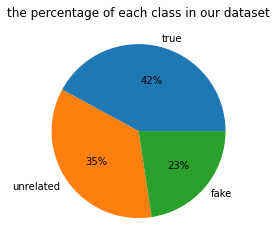

In [ ]:
true = final_df[final_df['sen_class'] == 'true']
unrelated = final_df[final_df['sen_class'] == 'unrelated']
fake = final_df[final_df['sen_class'] == 'fake']

fig, ax = plt.subplots()
ax.pie([len(true), len(unrelated),len(fake)], labels=['true', 'unrelated', 'fake'], autopct='%1.f%%')
ax.set_title('the percentage of each class in our dataset')

<AxesSubplot:>

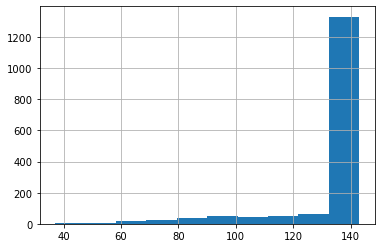

In [ ]:
final_df['text'].str.len().hist()

<AxesSubplot:>

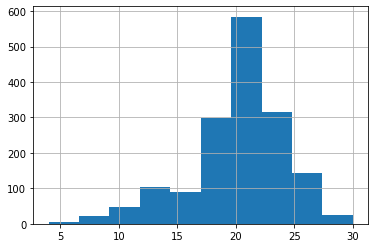

In [ ]:
final_df['text'].str.split().map(lambda x: len(x)).hist()

In [ ]:
text_data = ' '.join(final_df.text.values)

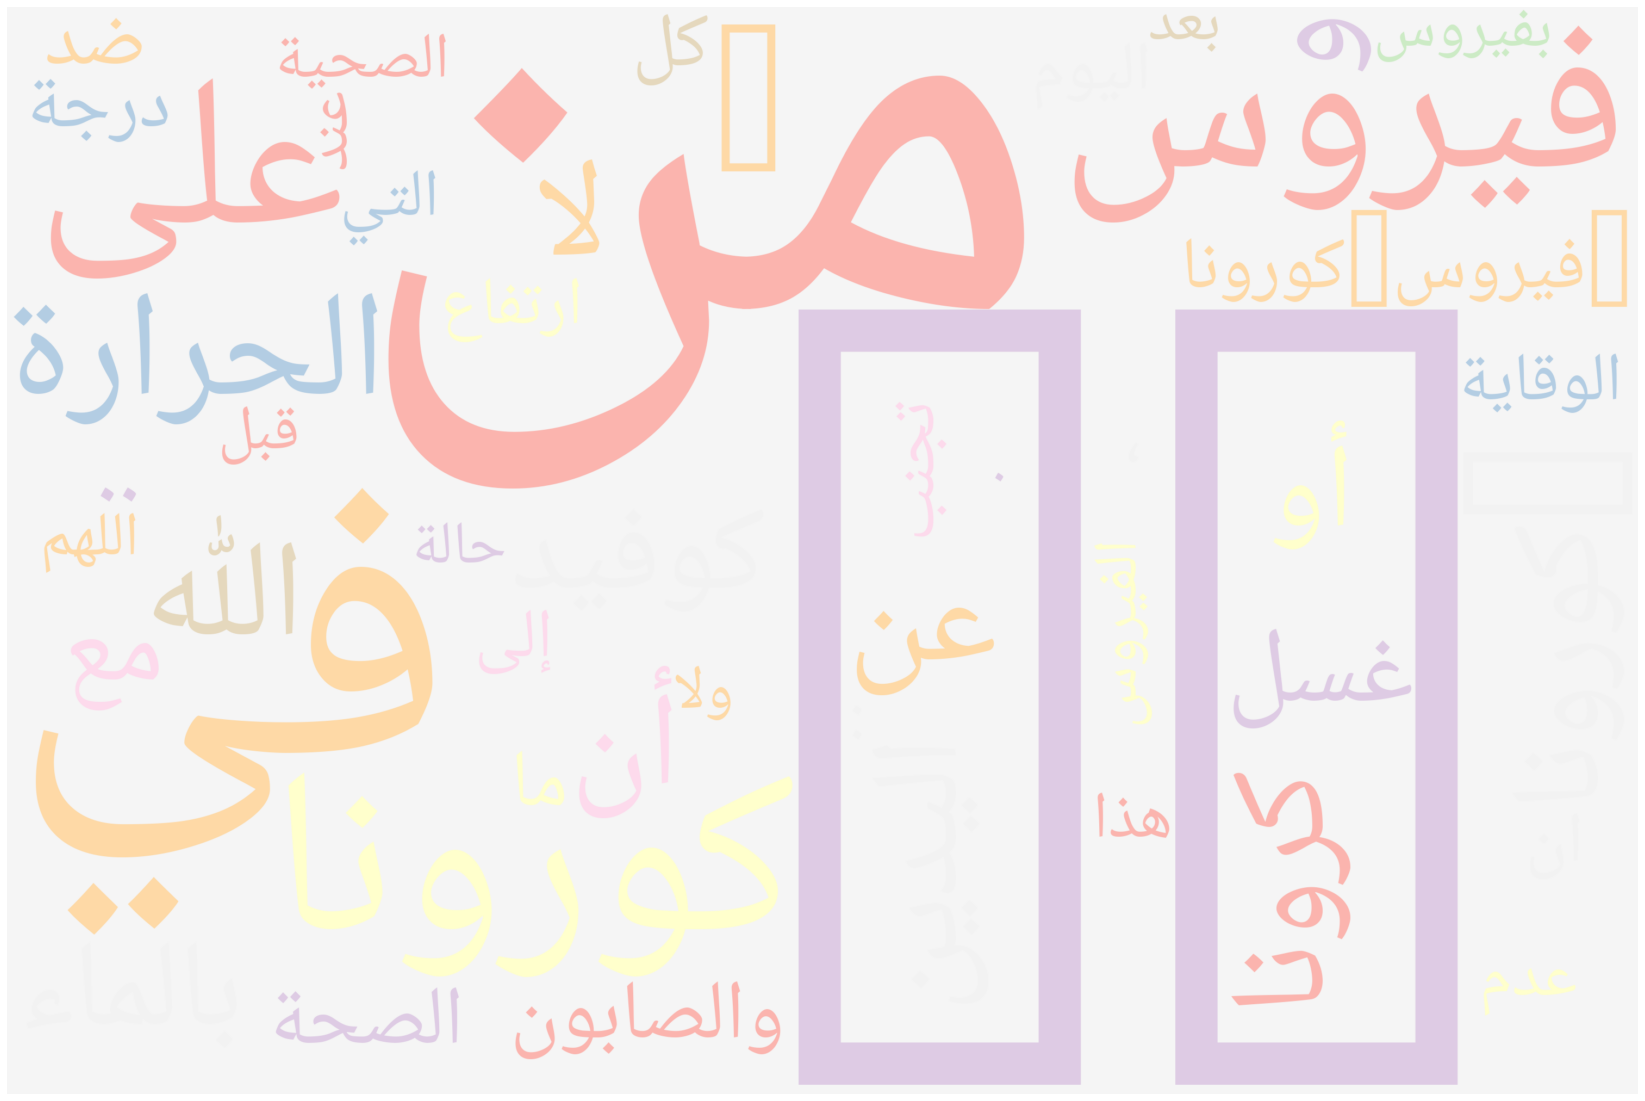

In [ ]:
from collections import Counter
from collections import defaultdict

from wordcloud import WordCloud          # pip install wordcloud
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display 


display = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text_data.split())
counts = {display(k):v for k, v in COUNTS.most_common(100)}

# download from: https://www.google.com/get/noto
font_file = 'NotoNaskhArabic-Regular.ttf'
wordcloud = WordCloud(width = 3000, height = 2000,max_words=50,  random_state=1, background_color='whitesmoke', colormap='Pastel1',font_path=font_file).generate_from_frequencies(counts)
fig = plt.figure()
fig.set_size_inches(30,20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
final_df_fake = final_df[final_df['sen_class'] == 'fake']

In [ ]:
final_df_unrelated = final_df[final_df['sen_class'] == 'unrelated']

In [ ]:
final_df_true = final_df[final_df['sen_class'] == 'true']

<AxesSubplot:>

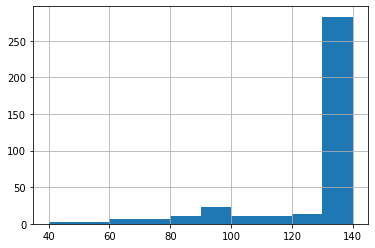

In [ ]:
final_df_fake['text'].str.len().hist()

<AxesSubplot:>

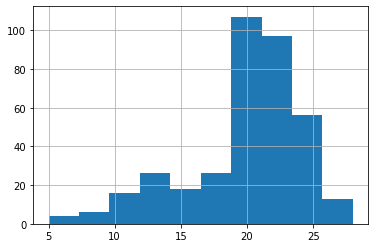

In [ ]:
final_df_fake['text'].str.split().map(lambda x: len(x)).hist()

In [ ]:
fake_text_data = ' '.join(final_df_fake.text.values)

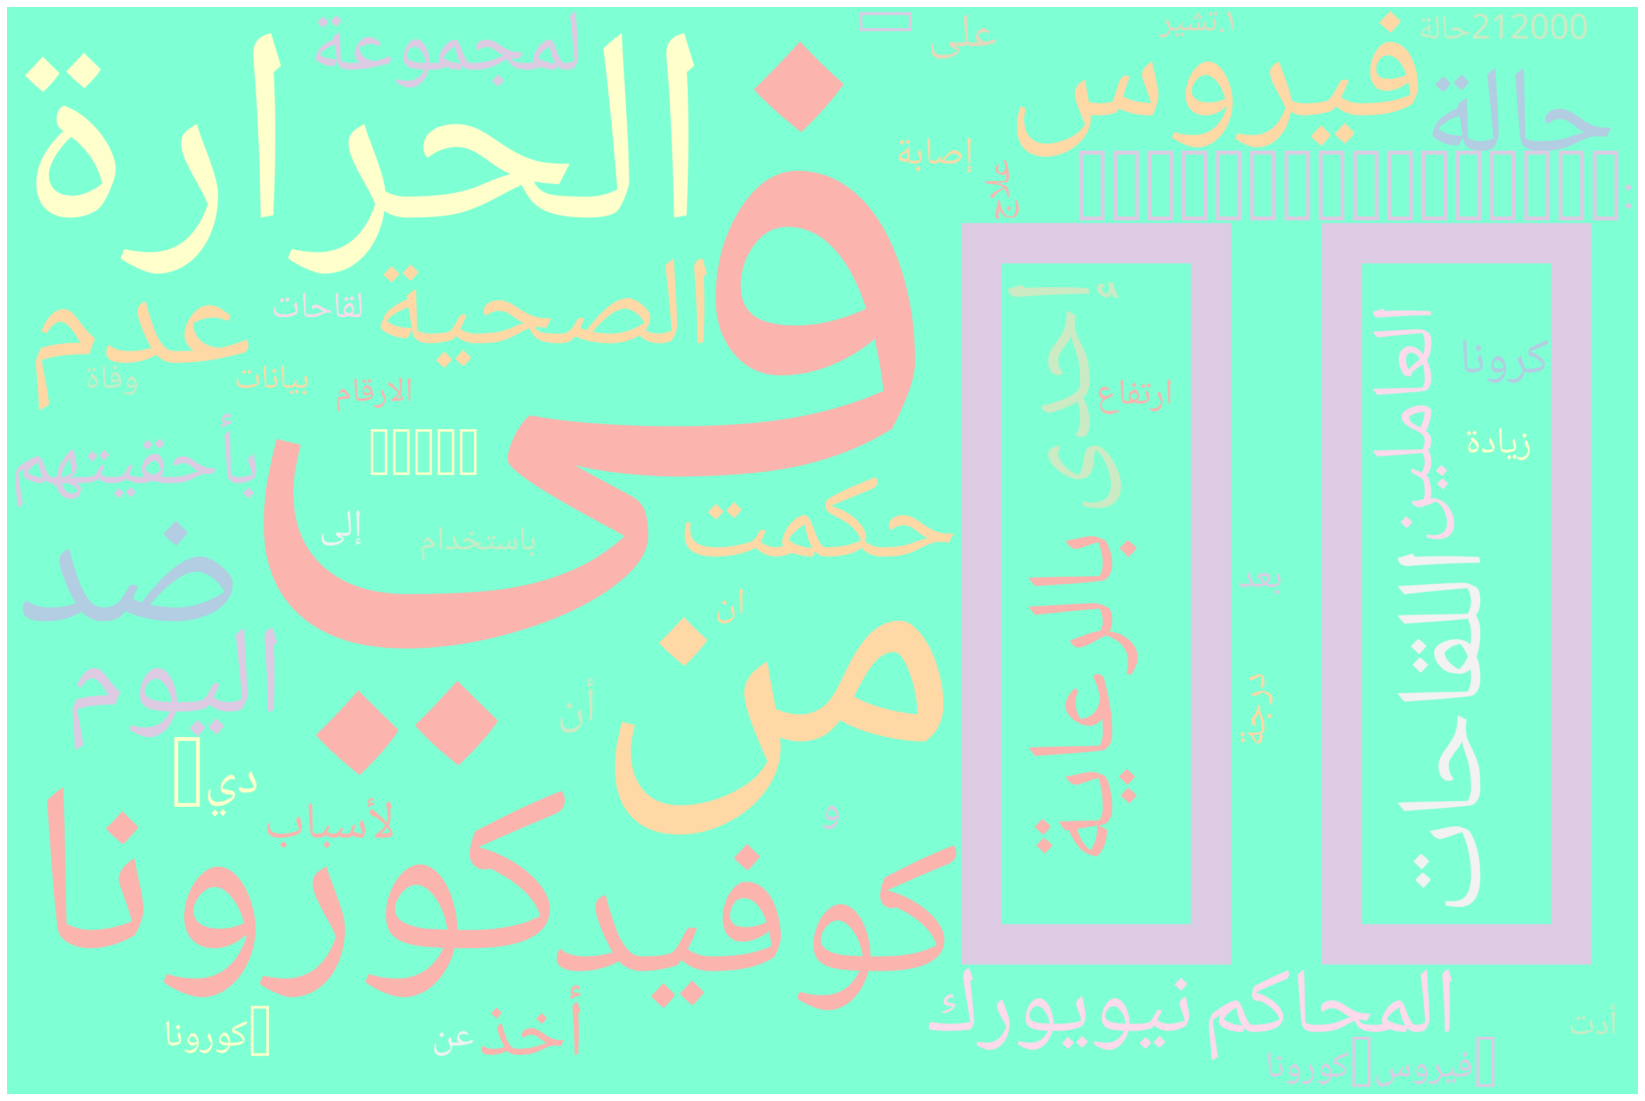

In [ ]:

display = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(fake_text_data.split())
counts = {display(k):v for k, v in COUNTS.most_common(100)}
wordcloud = WordCloud(width = 3000, height = 2000,max_words=50,  random_state=1, background_color='aquamarine', colormap='Pastel1',font_path=font_file).generate_from_frequencies(counts)
fig = plt.figure()
fig.set_size_inches(30,20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


<AxesSubplot:>

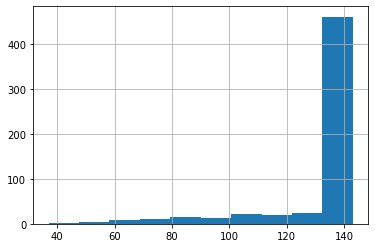

In [ ]:
final_df_unrelated['text'].str.len().hist()

<AxesSubplot:>

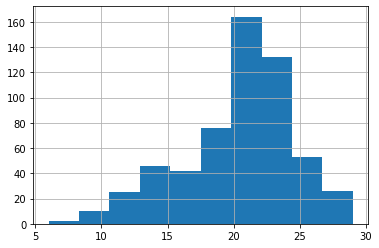

In [ ]:
final_df_unrelated['text'].str.split().map(lambda x: len(x)).hist()

In [ ]:
unrelated_text_data = ' '.join(final_df_unrelated.text.values)

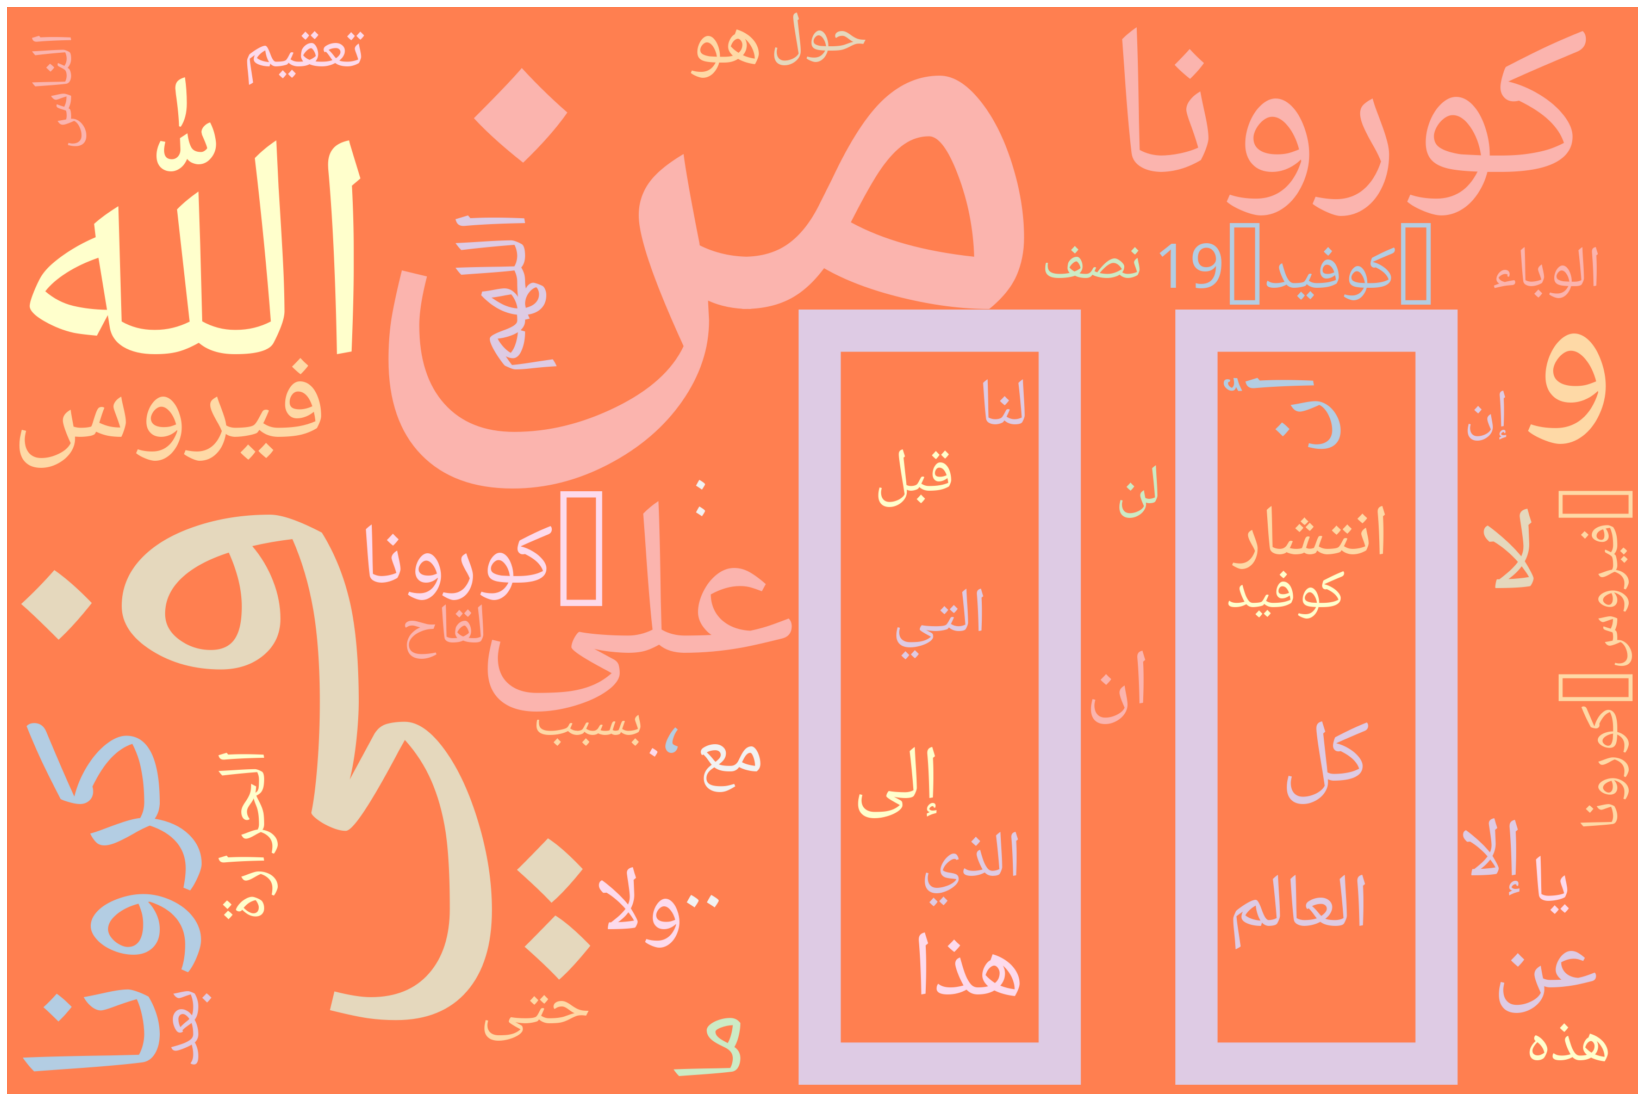

In [ ]:

display = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(unrelated_text_data.split())
counts = {display(k):v for k, v in COUNTS.most_common(100)}
wordcloud = WordCloud(width = 3000, height = 2000,max_words=50,  random_state=1, background_color='coral', colormap='Pastel1',font_path=font_file).generate_from_frequencies(counts)
fig = plt.figure()
fig.set_size_inches(30,20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


<AxesSubplot:>

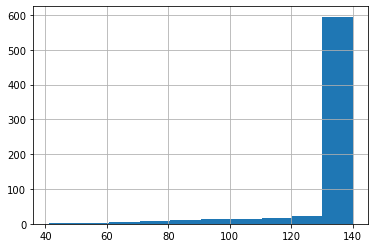

In [ ]:
final_df_true['text'].str.len().hist()

<AxesSubplot:>

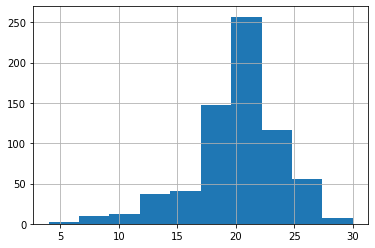

In [ ]:
final_df_true['text'].str.split().map(lambda x: len(x)).hist()

In [ ]:
true_text_data = ' '.join(final_df_true.text.values)

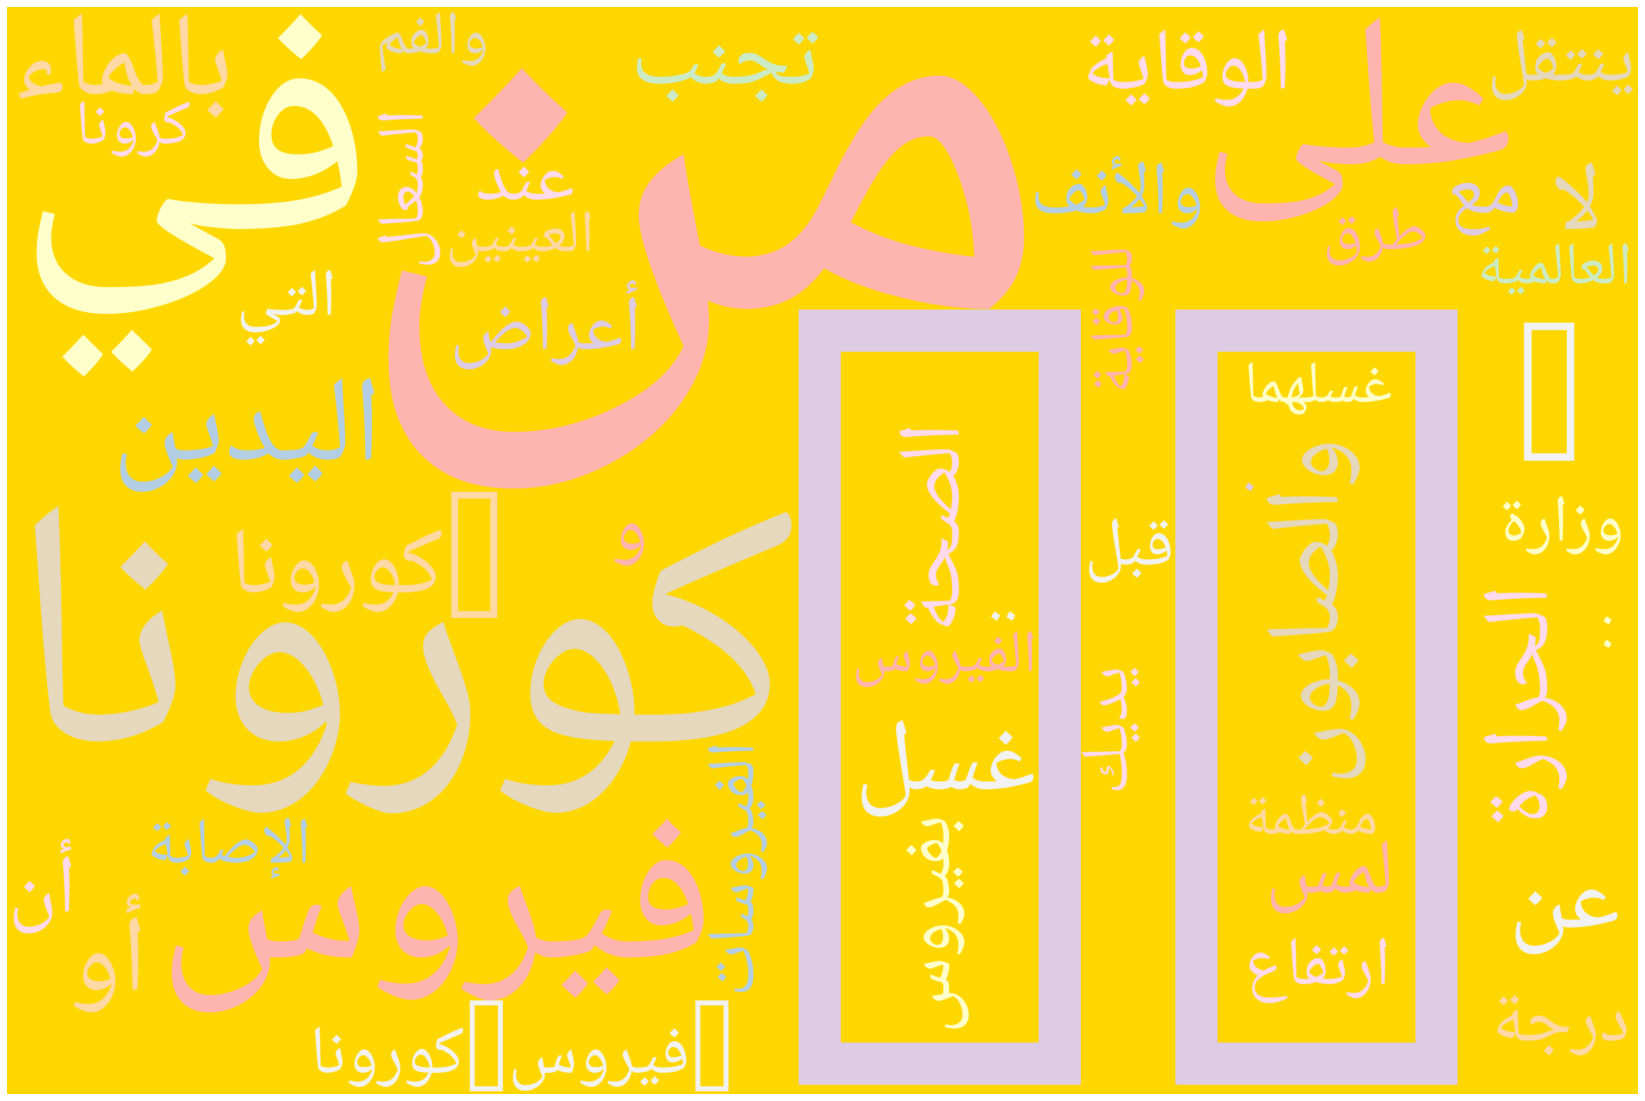

In [ ]:

display = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(true_text_data.split())
counts = {display(k):v for k, v in COUNTS.most_common(100)}
wordcloud = WordCloud(width = 3000, height = 2000,max_words=50,  random_state=1, background_color='gold', colormap='Pastel1',font_path=font_file).generate_from_frequencies(counts)
fig = plt.figure()
fig.set_size_inches(30,20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = stopwords.words('arabic')

corpus=[]
new= final_df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
corpus=[]
new= final_df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]


In [26]:
len(stop_words)

754

In [27]:
df = final_df.copy()

In [28]:
import re
import json
import string
import numpy as np
from string import punctuation
from nltk import *
import os

In [29]:
def clean(text):
    punctuation = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~.'
    text  = "".join([char for char in text if char not in punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    return text

In [30]:
def removestopwords(df):
    stop = stopwords.words('arabic')
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df['text'] = df['text'].apply(lambda x: clean(x))
    return df

In [31]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ؛"-…،'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations


arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def normalize_arabic(text):

    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text
def remove_punctuations(text):
    translator  = re.compile('[%s]' % re.escape(punctuations_list))
    translator .sub(' ', text)
    text = re.sub(' +',' ', text).strip()
    return text

def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

def reomve_mentions(text):
    return re.sub(r"(?:\@|https?\://)\S+", "", text)

def reomve_english_letter(text):
    return re.sub(r'[a-z]+', '', text) 


df['text'] = df['text'].apply(lambda x: normalize_arabic(x))
df['text'] = df['text'].apply(lambda x: remove_diacritics(x))

df['text'] = df['text'].apply(lambda x: remove_punctuations(x))
df['text'] = df['text'].apply(lambda x: remove_repeating_char(x))
df['text'] = df['text'].apply(lambda x: reomve_mentions(x))
df['text'] = df['text'].apply(lambda x: reomve_english_letter(x))
df['text'].replace(r'…',' ',inplace=True, regex=True)
df['text'].replace(r'_',' ',inplace=True, regex=True)
df['text'].replace(r'\\\)',' ',inplace=True, regex=True)
df['text'].replace(r'،',' ',inplace=True, regex=True)
df['text'].replace(r'"',' ',inplace=True, regex=True)
df['text'].replace(r'-',' ',inplace=True, regex=True)
df['text'].replace(r'؛',' ',inplace=True, regex=True)
df['text'].replace(r'/',' ',inplace=True, regex=True)
df['text'] = df['text'].str.replace('\d+', ' ')
df['text'] = df['text'].str.replace(' +',' ')
df['text'] = df['text'].str.replace('RT',' ')
df['text'] = df['text'].str.replace('#',' ')
df['text'] = df['text'].str.replace('\n',' ')
df['text'] = df['text'].str.replace('💔',' ')
df['text'] = df['text'].str.replace('👀',' ')
df['text'] = df['text'].str.replace('🌚',' ')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: FutureWarning: The default value of regex will change from True to False in a future version.


In [33]:
!pip install Tashaphyne

     |████████████████████████████████| 251 kB 4.9 MB/s 
     |████████████████████████████████| 126 kB 41.1 MB/s 


In [34]:
from tashaphyne.stemming import ArabicLightStemmer

tokenizer = RegexpTokenizer(r'\w+')
punctuations = string.punctuation
# create Arabic stop words list
ar_stop = list(stopwords.words('arabic'))
#ar_stop = list(stopwords.words('arabic'))
# Create Stemmer
arabic_stemmer = ArabicLightStemmer()


after_stopwords = []


for i in df["text"]:
    tokens = tokenizer.tokenize(i)
    #tagged_sent = i.split()
    stopped_tokens = [w for w in tokens if w not in ar_stop and w not in punctuations]
    stopped_tokens = [arabic_stemmer.light_stem(i) for i in stopped_tokens]
    
    #for words in tagged_sent:                           
    #    chunks = [words for words in tagged_sent if not words in ar_stop]     
        #chunks = [arabic_stemmer.light_stem(i) for i in chunks]

    after_stopwords.append(' '.join(stopped_tokens))
df['text'] = after_stopwords

In [35]:
df = df[df['text'].notnull()]

In [36]:
df.reset_index(drop=True, inplace=True)

In [37]:
df.head()

,text,sen_class
0,حال قادم مواط احد دول مجلس تعا خليج او مقيم او...,true
1,لهم نا نستودع لاد حرم ساءر لاد مسلم داء لاء له...,unrelated
2,روس ورو عدد وف قل لف نسا شهر جوع عدد وف لف نسا...,unrelated
3,زير صحه هتقعد صين شو ياري ما رجع قعد رءيس عبدا...,unrelated
4,حال راغب دخول مملكه مواط سعودي او مقيم تم شعار...,true


<AxesSubplot:>

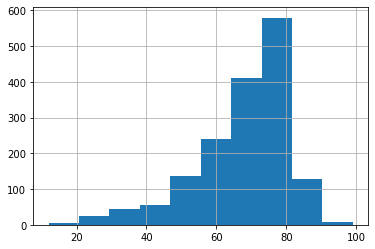

In [ ]:
df['text'].str.len().hist()

<AxesSubplot:>

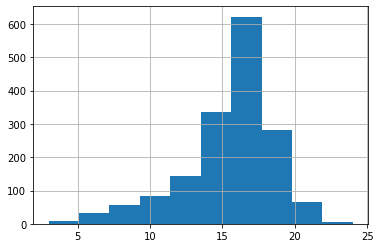

In [ ]:
df['text'].str.split().map(lambda x: len(x)).hist()

In [ ]:
text_data_clean = ' '.join(df.text.values)

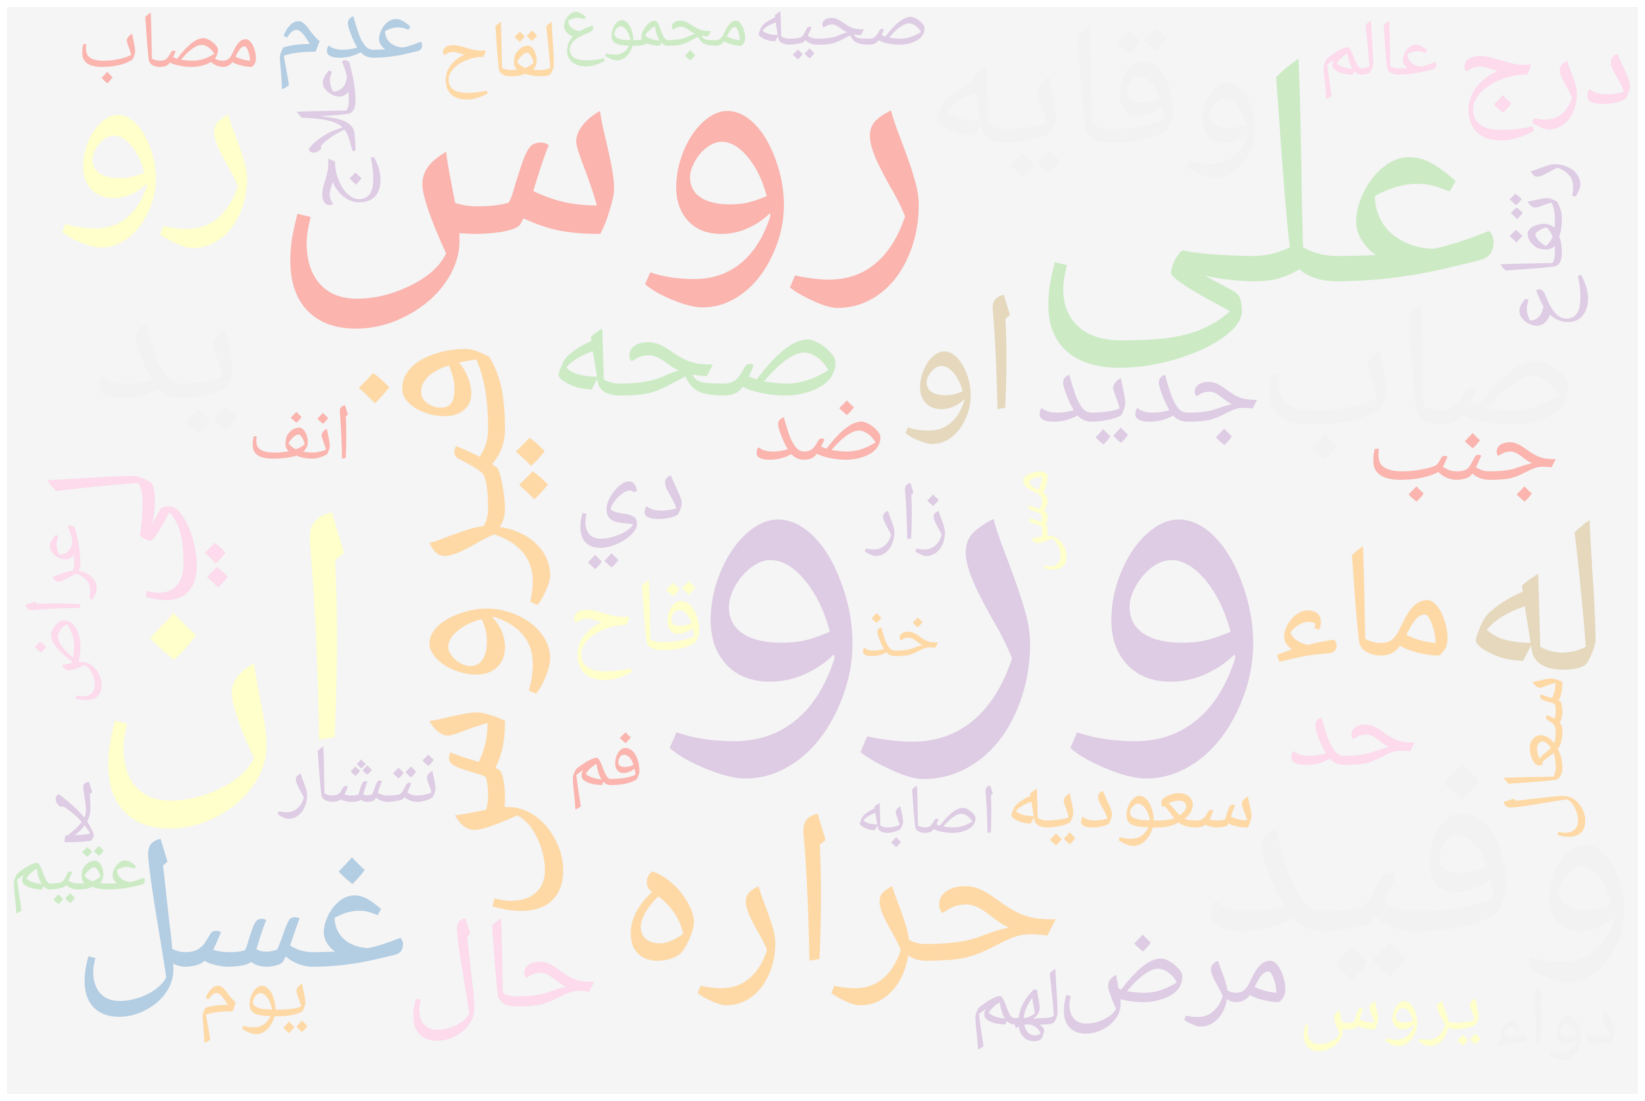

In [ ]:

display = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text_data_clean.split())
counts = {display(k):v for k, v in COUNTS.most_common(100)}
wordcloud = WordCloud(width = 3000, height = 2000,max_words=50,  random_state=1, background_color='whitesmoke', colormap='Pastel1',font_path=font_file).generate_from_frequencies(counts)
fig = plt.figure()
fig.set_size_inches(30,20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [38]:
df_fake = df[df['sen_class'] == 'fake']

df_unrelated = df[df['sen_class'] == 'unrelated']

df_true = df[df['sen_class'] == 'true']

<AxesSubplot:>

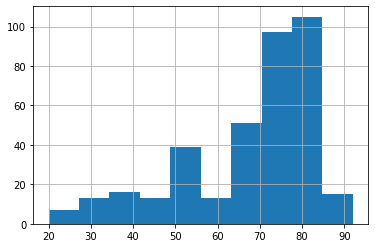

In [ ]:
df_fake['text'].str.len().hist()

<AxesSubplot:>

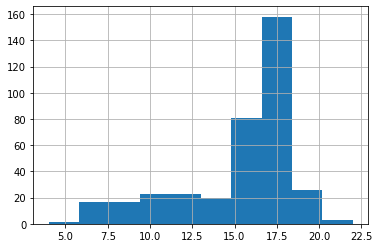

In [ ]:
df_fake['text'].str.split().map(lambda x: len(x)).hist()

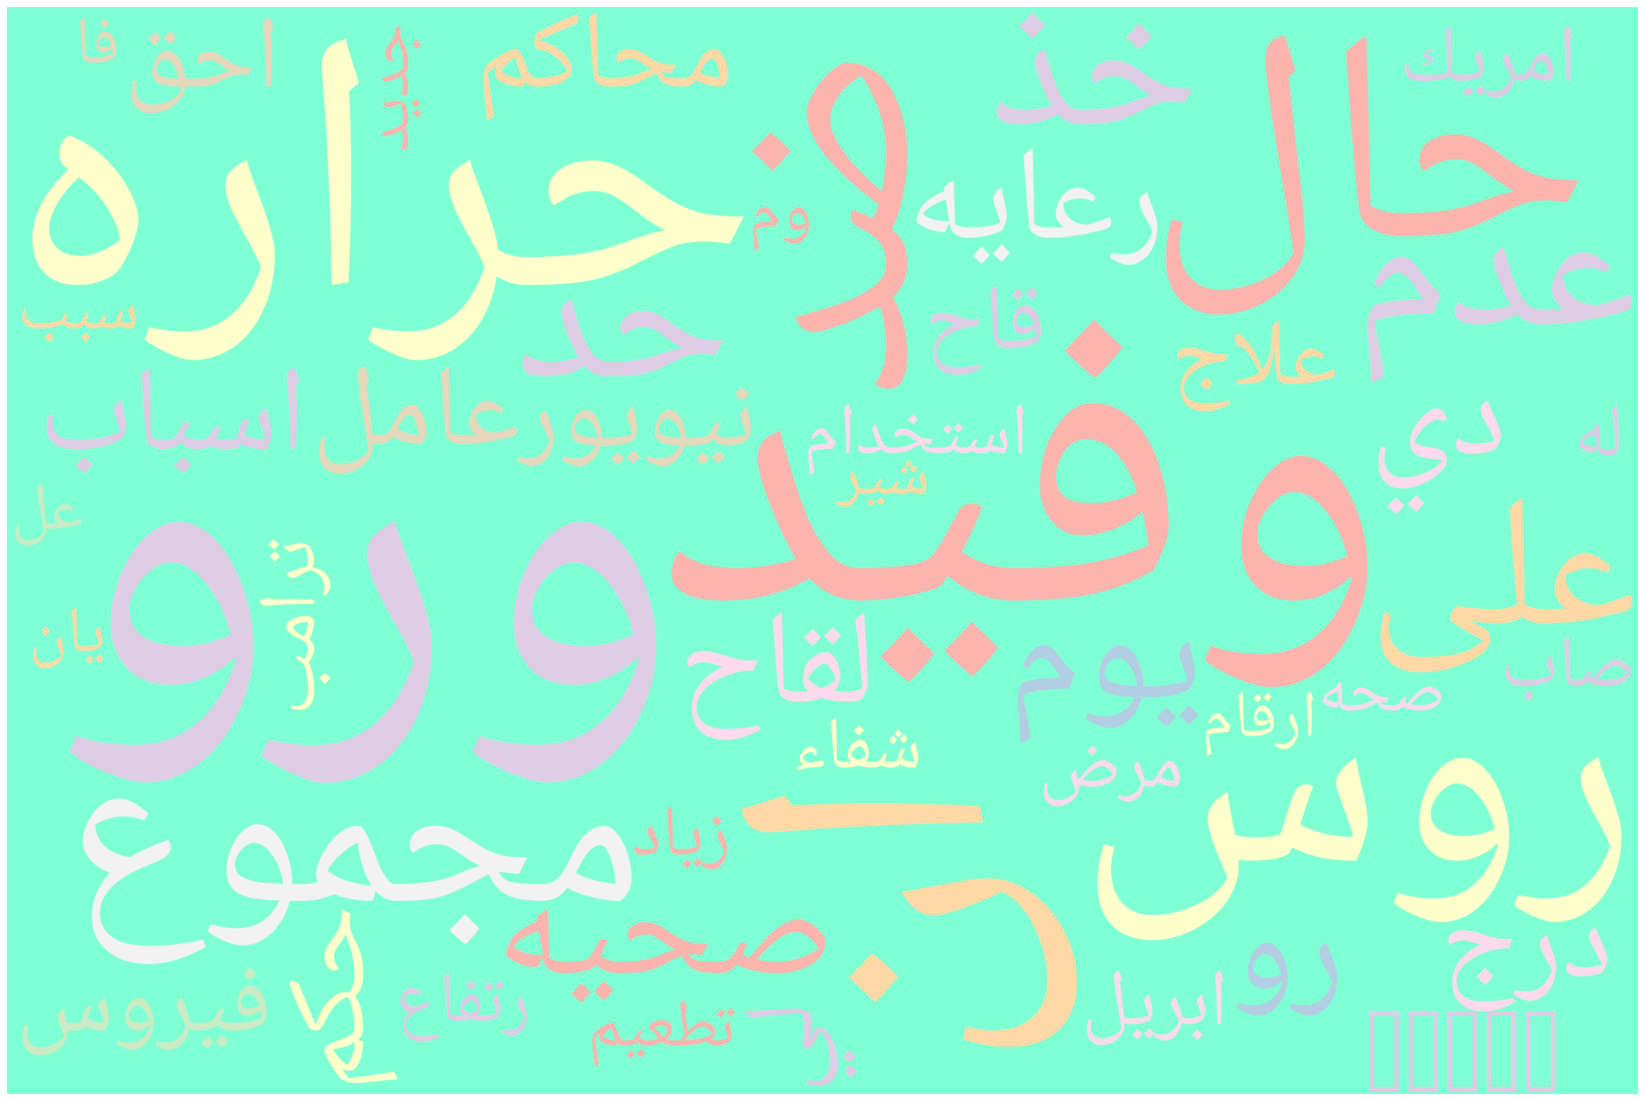

In [ ]:
fake_text_data = ' '.join(df_fake.text.values)



display = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(fake_text_data.split())
counts = {display(k):v for k, v in COUNTS.most_common(100)}
wordcloud = WordCloud(width = 3000, height = 2000,max_words=50,  random_state=1, background_color='aquamarine', colormap='Pastel1',font_path=font_file).generate_from_frequencies(counts)
fig = plt.figure()
fig.set_size_inches(30,20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<AxesSubplot:>

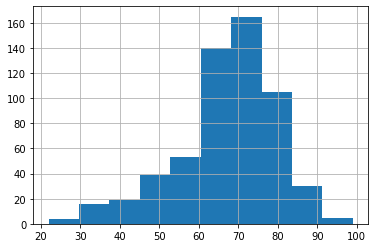

In [ ]:
df_unrelated['text'].str.len().hist()

<AxesSubplot:>

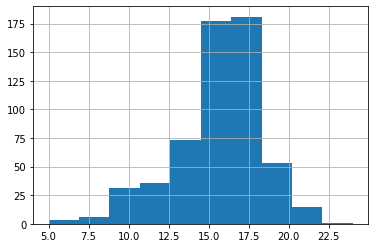

In [ ]:
df_unrelated['text'].str.split().map(lambda x: len(x)).hist()

In [ ]:
unrelated_text_data = ' '.join(df_unrelated.text.values)


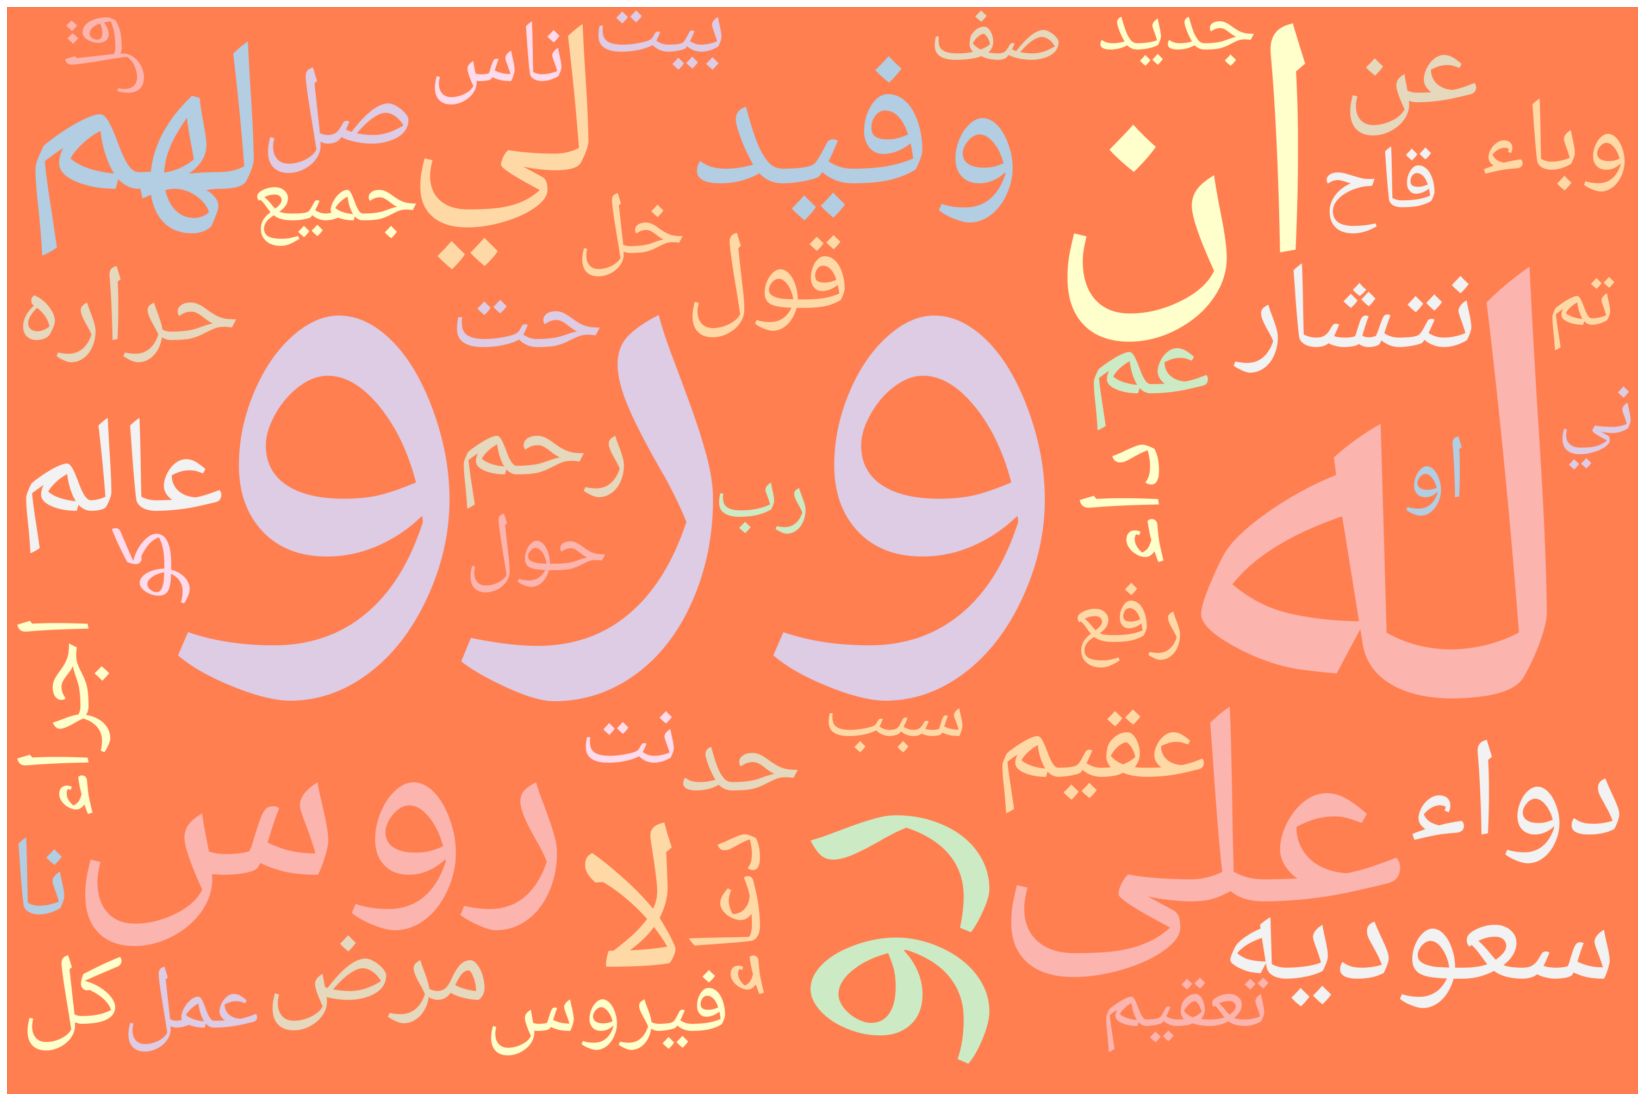

In [ ]:
display = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(unrelated_text_data.split())
counts = {display(k):v for k, v in COUNTS.most_common(100)}
wordcloud = WordCloud(width = 3000, height = 2000,max_words=50,  random_state=1, background_color='coral', colormap='Pastel1',font_path=font_file).generate_from_frequencies(counts)
fig = plt.figure()
fig.set_size_inches(30,20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<AxesSubplot:>

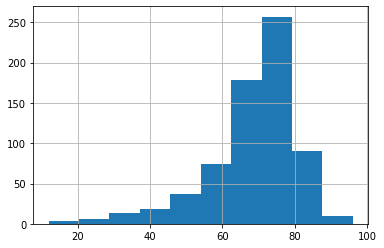

In [ ]:
df_true['text'].str.len().hist()

<AxesSubplot:>

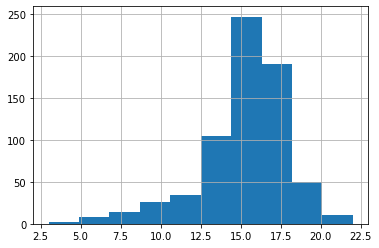

In [ ]:
df_true['text'].str.split().map(lambda x: len(x)).hist()

In [ ]:
true_text_data = ' '.join(df_true.text.values)

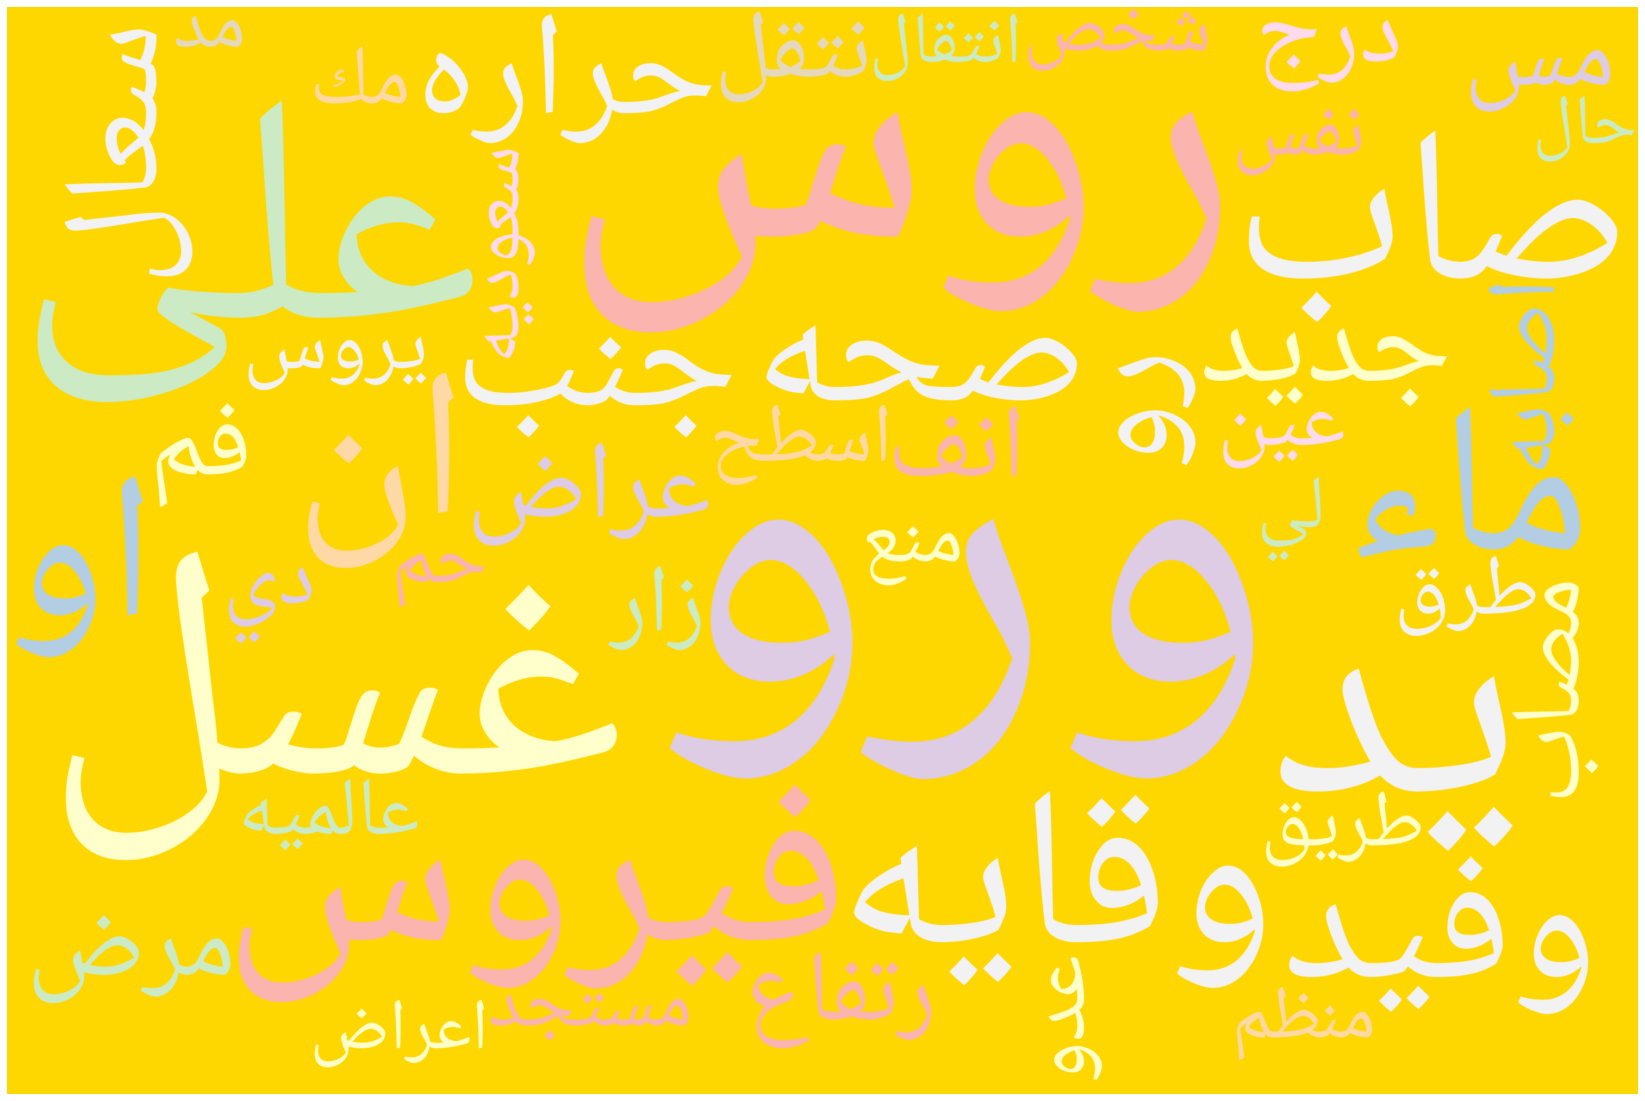

In [ ]:
display = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(true_text_data.split())
counts = {display(k):v for k, v in COUNTS.most_common(100)}
wordcloud = WordCloud(width = 3000, height = 2000,max_words=50,  random_state=1, background_color='gold', colormap='Pastel1',font_path=font_file).generate_from_frequencies(counts)
fig = plt.figure()
fig.set_size_inches(30,20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## training step

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # two vectorization methods we want for later
from sklearn.model_selection import train_test_split # this splits the data loaded in into training & testing groups
from sklearn import metrics # this will help us understand the results of the train/test split simulation

In [40]:
df['label'] =df['sen_class']
df = df[['text','label']]

X = df['text'].values
y = df['label'].values

# split the new DataFrame into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1, stratify = df.label)

In [41]:
X_train.shape

(1305,)

In [42]:
# define a function that accepts a vectorizer and calculates the accuracy
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB # multinomial naive bayes classifier
from sklearn.linear_model import LogisticRegression # basic logistic regression classifier

from sklearn.svm import SVC

lr = LogisticRegression()
nb = MultinomialNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC()
def tokenize_test(vect, model):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    if model == 'lr':
        lr.fit(X_train_dtm, y_train)
        y_pred_class = lr.predict(X_test_dtm)
        algorithm = 'Logistic Regression'
    elif model == 'nb':
        nb.fit(X_train_dtm, y_train)
        y_pred_class = nb.predict(X_test_dtm)
        algorithm = 'Multinomial Naive Bayes'
    elif model == 'dt':
        dt.fit(X_train_dtm, y_train)
        y_pred_class = dt.predict(X_test_dtm)
        algorithm = 'Decision Tree'
    elif model == 'knn':
        knn.fit(X_train_dtm, y_train)
        y_pred_class = knn.predict(X_test_dtm)
        algorithm = 'K Neighbors'
    elif model == 'svm':
        svm.fit(X_train_dtm, y_train)
        y_pred_class = svm.predict(X_test_dtm)
        algorithm = 'SVM'
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print(confusion_matrix(y_test,y_pred_class))
    print(classification_report(y_test, y_pred_class))
    print(algorithm)
        

In [ ]:
vect = CountVectorizer()
tokenize_test(vect, model='lr')

Features:  3601
Accuracy:  0.8470948012232415
[[ 62   6   6]
 [  5 118  15]
 [  6  12  97]]
              precision    recall  f1-score   support

        fake       0.85      0.84      0.84        74
        true       0.87      0.86      0.86       138
   unrelated       0.82      0.84      0.83       115

    accuracy                           0.85       327
   macro avg       0.85      0.85      0.85       327
weighted avg       0.85      0.85      0.85       327

Logistic Regression


In [ ]:
# include 1-grams and 2-grams

vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='lr')

Features:  15459
Accuracy:  0.8623853211009175
[[ 60   6   8]
 [  4 120  14]
 [  2  11 102]]
              precision    recall  f1-score   support

        fake       0.91      0.81      0.86        74
        true       0.88      0.87      0.87       138
   unrelated       0.82      0.89      0.85       115

    accuracy                           0.86       327
   macro avg       0.87      0.86      0.86       327
weighted avg       0.86      0.86      0.86       327

Logistic Regression


In [ ]:
vect = CountVectorizer()
tokenize_test(vect, model='nb')

Features:  3601
Accuracy:  0.8256880733944955
[[ 55  12   7]
 [  2 126  10]
 [  7  19  89]]
              precision    recall  f1-score   support

        fake       0.86      0.74      0.80        74
        true       0.80      0.91      0.85       138
   unrelated       0.84      0.77      0.81       115

    accuracy                           0.83       327
   macro avg       0.83      0.81      0.82       327
weighted avg       0.83      0.83      0.82       327

Multinomial Naive Bayes


In [ ]:
# include 1-grams, 2-grams, 
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='nb')

Features:  15459
Accuracy:  0.8165137614678899
[[ 51  17   6]
 [  2 129   7]
 [  3  25  87]]
              precision    recall  f1-score   support

        fake       0.91      0.69      0.78        74
        true       0.75      0.93      0.83       138
   unrelated       0.87      0.76      0.81       115

    accuracy                           0.82       327
   macro avg       0.85      0.79      0.81       327
weighted avg       0.83      0.82      0.81       327

Multinomial Naive Bayes


In [ ]:
vect = CountVectorizer()
tokenize_test(vect, model='dt')

Features:  3601
Accuracy:  0.7675840978593272
[[ 56   8  10]
 [ 13 105  20]
 [  7  18  90]]
              precision    recall  f1-score   support

        fake       0.74      0.76      0.75        74
        true       0.80      0.76      0.78       138
   unrelated       0.75      0.78      0.77       115

    accuracy                           0.77       327
   macro avg       0.76      0.77      0.76       327
weighted avg       0.77      0.77      0.77       327

Decision Tree


In [ ]:
# include 1-grams and 2-grams

vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='dt')

Features:  15459
Accuracy:  0.7798165137614679
[[ 61   7   6]
 [ 15 101  22]
 [  8  14  93]]
              precision    recall  f1-score   support

        fake       0.73      0.82      0.77        74
        true       0.83      0.73      0.78       138
   unrelated       0.77      0.81      0.79       115

    accuracy                           0.78       327
   macro avg       0.77      0.79      0.78       327
weighted avg       0.78      0.78      0.78       327

Decision Tree


In [ ]:
vect = CountVectorizer()
tokenize_test(vect, model='knn')

Features:  3601
Accuracy:  0.617737003058104
[[ 56  18   0]
 [ 17 120   1]
 [ 17  72  26]]
              precision    recall  f1-score   support

        fake       0.62      0.76      0.68        74
        true       0.57      0.87      0.69       138
   unrelated       0.96      0.23      0.37       115

    accuracy                           0.62       327
   macro avg       0.72      0.62      0.58       327
weighted avg       0.72      0.62      0.57       327

K Neighbors


In [ ]:
# include 1-grams and 2-grams

vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='knn')

Features:  15459
Accuracy:  0.5749235474006116
[[ 50  24   0]
 [ 13 125   0]
 [ 12  90  13]]
              precision    recall  f1-score   support

        fake       0.67      0.68      0.67        74
        true       0.52      0.91      0.66       138
   unrelated       1.00      0.11      0.20       115

    accuracy                           0.57       327
   macro avg       0.73      0.56      0.51       327
weighted avg       0.72      0.57      0.50       327

K Neighbors


In [ ]:
vect = CountVectorizer()
tokenize_test(vect, model='svm')

Features:  3601
Accuracy:  0.8379204892966361
[[ 58   6  10]
 [  3 118  17]
 [  3  14  98]]
              precision    recall  f1-score   support

        fake       0.91      0.78      0.84        74
        true       0.86      0.86      0.86       138
   unrelated       0.78      0.85      0.82       115

    accuracy                           0.84       327
   macro avg       0.85      0.83      0.84       327
weighted avg       0.84      0.84      0.84       327

SVM


In [ ]:

# include 1-grams and 2-grams

vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='svm')

Features:  15459
Accuracy:  0.8195718654434251
[[ 56   9   9]
 [  3 120  15]
 [  3  20  92]]
              precision    recall  f1-score   support

        fake       0.90      0.76      0.82        74
        true       0.81      0.87      0.84       138
   unrelated       0.79      0.80      0.80       115

    accuracy                           0.82       327
   macro avg       0.83      0.81      0.82       327
weighted avg       0.82      0.82      0.82       327

SVM


## TF-IDF

In [ ]:
vect = TfidfVectorizer()
tokenize_test(vect, model='lr')


Features:  3601
Accuracy:  0.8287461773700305
[[ 52   8  14]
 [  2 120  16]
 [  2  14  99]]
              precision    recall  f1-score   support

        fake       0.93      0.70      0.80        74
        true       0.85      0.87      0.86       138
   unrelated       0.77      0.86      0.81       115

    accuracy                           0.83       327
   macro avg       0.85      0.81      0.82       327
weighted avg       0.84      0.83      0.83       327

Logistic Regression


In [ ]:
# include 1-grams and 2-grams

vect = TfidfVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='lr')

Features:  15459
Accuracy:  0.8134556574923547
[[ 52  12  10]
 [  3 123  12]
 [  0  24  91]]
              precision    recall  f1-score   support

        fake       0.95      0.70      0.81        74
        true       0.77      0.89      0.83       138
   unrelated       0.81      0.79      0.80       115

    accuracy                           0.81       327
   macro avg       0.84      0.80      0.81       327
weighted avg       0.82      0.81      0.81       327

Logistic Regression


In [ ]:
vect = TfidfVectorizer()
tokenize_test(vect, model='nb')

Features:  3601
Accuracy:  0.8012232415902141
[[ 43  21  10]
 [  0 134   4]
 [  2  28  85]]
              precision    recall  f1-score   support

        fake       0.96      0.58      0.72        74
        true       0.73      0.97      0.83       138
   unrelated       0.86      0.74      0.79       115

    accuracy                           0.80       327
   macro avg       0.85      0.76      0.78       327
weighted avg       0.83      0.80      0.80       327

Multinomial Naive Bayes


In [ ]:
# include 1-grams, 2-grams, 
vect = TfidfVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='nb')

Features:  15459
Accuracy:  0.7889908256880734
[[ 43  24   7]
 [  1 133   4]
 [  0  33  82]]
              precision    recall  f1-score   support

        fake       0.98      0.58      0.73        74
        true       0.70      0.96      0.81       138
   unrelated       0.88      0.71      0.79       115

    accuracy                           0.79       327
   macro avg       0.85      0.75      0.78       327
weighted avg       0.83      0.79      0.78       327

Multinomial Naive Bayes


In [ ]:
vect = TfidfVectorizer()
tokenize_test(vect, model='dt')

Features:  3601
Accuracy:  0.6850152905198776
[[ 55  11   8]
 [ 10 104  24]
 [ 14  36  65]]
              precision    recall  f1-score   support

        fake       0.70      0.74      0.72        74
        true       0.69      0.75      0.72       138
   unrelated       0.67      0.57      0.61       115

    accuracy                           0.69       327
   macro avg       0.69      0.69      0.68       327
weighted avg       0.68      0.69      0.68       327

Decision Tree


In [ ]:
# include 1-grams and 2-grams

vect = TfidfVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='dt')

Features:  15459
Accuracy:  0.7186544342507645
[[ 56  14   4]
 [ 12 111  15]
 [  9  38  68]]
              precision    recall  f1-score   support

        fake       0.73      0.76      0.74        74
        true       0.68      0.80      0.74       138
   unrelated       0.78      0.59      0.67       115

    accuracy                           0.72       327
   macro avg       0.73      0.72      0.72       327
weighted avg       0.73      0.72      0.72       327

Decision Tree


In [ ]:
vect = TfidfVectorizer()
tokenize_test(vect, model='knn')

Features:  3601
Accuracy:  0.7767584097859327
[[ 57  14   3]
 [  9 121   8]
 [ 11  28  76]]
              precision    recall  f1-score   support

        fake       0.74      0.77      0.75        74
        true       0.74      0.88      0.80       138
   unrelated       0.87      0.66      0.75       115

    accuracy                           0.78       327
   macro avg       0.79      0.77      0.77       327
weighted avg       0.79      0.78      0.77       327

K Neighbors


In [ ]:
# include 1-grams and 2-grams

vect = TfidfVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='knn')

Features:  15459
Accuracy:  0.7553516819571865
[[ 56  15   3]
 [ 10 121   7]
 [ 12  33  70]]
              precision    recall  f1-score   support

        fake       0.72      0.76      0.74        74
        true       0.72      0.88      0.79       138
   unrelated       0.88      0.61      0.72       115

    accuracy                           0.76       327
   macro avg       0.77      0.75      0.75       327
weighted avg       0.77      0.76      0.75       327

K Neighbors


In [ ]:
vect = TfidfVectorizer()
tokenize_test(vect, model='svm')

Features:  3601
Accuracy:  0.8409785932721713
[[ 51   8  15]
 [  1 119  18]
 [  1   9 105]]
              precision    recall  f1-score   support

        fake       0.96      0.69      0.80        74
        true       0.88      0.86      0.87       138
   unrelated       0.76      0.91      0.83       115

    accuracy                           0.84       327
   macro avg       0.87      0.82      0.83       327
weighted avg       0.85      0.84      0.84       327

SVM


In [ ]:

# include 1-grams and 2-grams

vect = TfidfVectorizer(ngram_range=(1, 2))
tokenize_test(vect, model='svm')

Features:  15459
Accuracy:  0.8195718654434251
[[ 49  12  13]
 [  1 122  15]
 [  0  18  97]]
              precision    recall  f1-score   support

        fake       0.98      0.66      0.79        74
        true       0.80      0.88      0.84       138
   unrelated       0.78      0.84      0.81       115

    accuracy                           0.82       327
   macro avg       0.85      0.80      0.81       327
weighted avg       0.83      0.82      0.82       327

SVM


## Deep Learning

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

In [55]:
#df['label'] =df['sen_class']
#df = df[['text','label']]
df['label'] = df['label'].astype('str').values
df['label'] = df['label'].astype('category').values
df['label'] = df['label'].cat.codes
df['label'].value_counts()


1    687
2    576
0    369
Name: label, dtype: int64

In [56]:
X = df['text'].values
y = df['label'].values

# split the new DataFrame into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1, stratify = df.label)

In [57]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
#tokenizer = Tokenizer(num_words=500)

tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [58]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train_sequences[2])
print(X_train[2])

[1787, 1788, 65, 1, 1789, 91, 1790, 191, 65, 1791, 1792, 554, 166, 1793, 103, 938]
ضجيج حاصل سبب ورو تصفيق عال نال بعض سبب قيام واجب ازمه مع نشغال جميع حتم


In [59]:
from keras.preprocessing.sequence import pad_sequences

#maxlen = 25

maxlen = 25



X_train_pad = pad_sequences(X_train_sequences, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_sequences, padding='post', maxlen=maxlen)

print(X_train_pad[0, :])

[1782  112  190    1   22 1783 1784  756 1197  180  757   22 1198 1785
 1786    0    0    0    0    0    0    0    0    0    0]


In [60]:
embedding_dim = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 500)           1807000   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 500)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,812,043
Trainable params: 1,812,043
Non-trainable params: 0
_________________________________________________________________


In [63]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 0.9977
Testing Accuracy:  0.8471


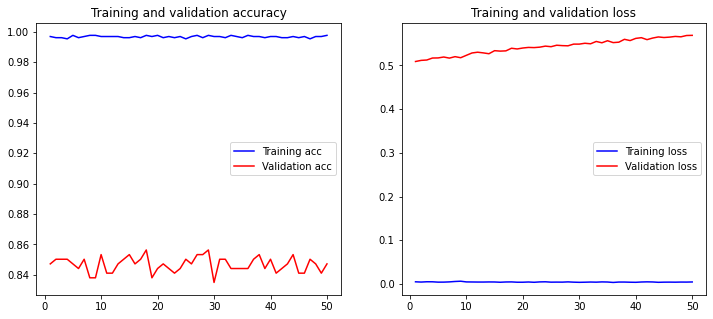

In [64]:
history = model.fit(X_train_pad, 
                    y_train,epochs=50,
                    verbose=False,
                    validation_data=(X_test_pad, y_test),
                    batch_size=50)
loss, accuracy = model.evaluate(X_train_pad, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [67]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#ynew = model.predict_classes(X_test)

predict_x=model.predict(X_test_pad) 
classes_x=np.argmax(predict_x,axis=1)

print(confusion_matrix(y_test,classes_x))
print(classification_report(y_test,classes_x))
print(accuracy_score(y_test, classes_x))

[[ 60   9   5]
 [  4 119  15]
 [  8   9  98]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        74
           1       0.87      0.86      0.87       138
           2       0.83      0.85      0.84       115

    accuracy                           0.85       327
   macro avg       0.84      0.84      0.84       327
weighted avg       0.85      0.85      0.85       327

0.8470948012232415


## Comparison Table for Models with Text Cleaning

| classifier | Accuracy | Precision | Recall | F1 score |
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.85 |  0.85 | 0.85 | 0.85 |
| Logistic Regression & ngram| 0.86 |  0.87 | 0.86 | 0.86 |
| Logistic Regression & TF-IDF| 0.83 |  0.85 | 0.81 | 0.82 |
| Logistic Regression & TF-IDF & ngram| 0.83 |  0.85 | 0.81 | 0.82 |
| Multinomial Naive Bayes| 0.83 |  0.83 | 0.81 | 0.82 |
| Multinomial Naive Bayes & ngram| 0.82 |  0.85 | 0.79 | 0.81 |
| Multinomial Naive Bayes & TF-IDF | 0.80 |  0.85 | 0.76 | 0.78 |
| Multinomial Naive Bayes & TF-IDF & ngram| 0.79 |  0.85 | 0.75 | 0.78 |
| Decision Tree| 0.77 |  0.76 | 0.77 | 0.76 |
| Decision Tree & ngram| 0.78 |  0.77 | 0.79 | 0.78 |
| Decision Tree & TF-IDF| 0.69 |  0.69 | 0.69 | 0.68 |
| Decision Tree & TF-IDF & ngram| 0.72 |  0.73 | 0.72 | 0.77 |
| K Neighbors| 0.62 |  0.72 | 0.62 | 0.58 |
| K Neighbors & ngram| 0.57 |  0.73 | 0.56 | 0.51 |
| K Neighbors & TF-IDF | 0.78 |  0.79 | 0.77 | 0.77 |
| K Neighbors & TF-IDF & ngram| 0.76 |  0.77 | 0.75 | 0.75 |
| SVM | 0.84 |  0.85 | 0.83 | 0.84 |
| SVM & ngram | 0.82 |  0.83 | 0.81 | 0.82 |
| SVM & TF-IDF | 0.84 |  0.87 | 0.82 | 0.83 |
| SVM & TF-IDF & ngram| 0.82 |  0.85 | 0.80 | 0.81 |
| Deep Learning & Word Embeddings | 0.85 |  0.84 | 0.84 | 0.84 |
